# <center><b> LOAN APPROVAL PREDICTION </b></center>


# **A. Import Packages and Dataset**

### 1. Import Packages

In [1]:
import pandas as pd             # Package for data processing
import numpy as np              # Package for mathematic operation

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

### 2. Import Dataset

In [2]:
# Read CSV data
data = pd.read_csv("loan_prediction")

# **B. Data Exploration**

### 1. Data Understanding

In [3]:
data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes, 
                         'amount_unique':data.nunique(), 
                         'unique_values':[data[x].unique() for x in data.columns],
                         'missing_values':data.isna().sum(),
                         'percentage_missing_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))
check_data(data)

,type,amount_unique,unique_values,missing_values,percentage_missing_values(%)
Loan_ID,object,614,"[LP001002, LP001003, LP001005, LP001006, LP001...",0,0.00
Gender,object,2,"[Male, Female, nan]",13,2.12
Married,object,2,"[No, Yes, nan]",3,0.49
Dependents,object,4,"[0, 1, 2, 3+, nan]",15,2.44
Education,object,2,"[Graduate, Not Graduate]",0,0.00
Self_Employed,object,2,"[No, Yes, nan]",32,5.21
ApplicantIncome,int64,505,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",0,0.00
CoapplicantIncome,float64,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",0,0.00
LoanAmount,float64,203,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...",22,3.58
Loan_Amount_Term,float64,10,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",14,2.28


### 2. Data Preparation

**a. Visualization of Gender**

Number of people who take a loan group by 'Gender':
Male      489
Female    112
Name: Gender, dtype: int64


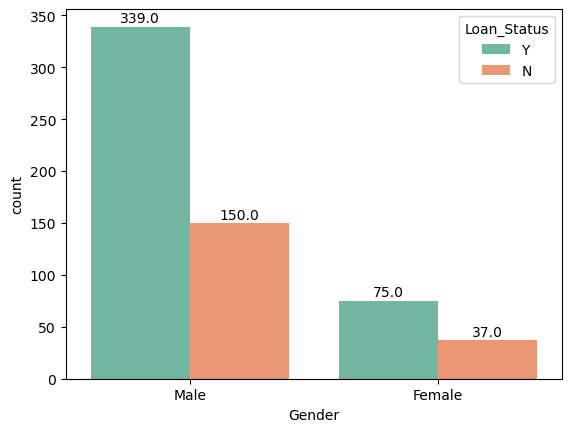

In [7]:
print("Number of people who take a loan group by 'Gender':")
print(data['Gender'].value_counts())
ax = sns.countplot(x='Gender', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 6), 
                textcoords='offset points')

**b. Visualization of Marrital Status**

Number of people who take a loan group by 'Marrital Status':
Yes    398
No     213
Name: Married, dtype: int64


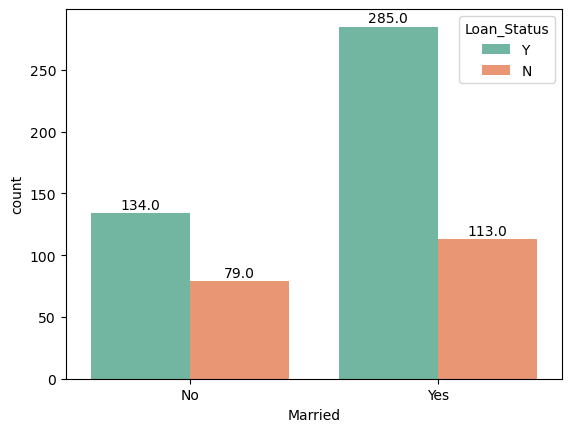

In [8]:
print("Number of people who take a loan group by 'Marrital Status':")
print(data['Married'].value_counts())
ax = sns.countplot(x='Married', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 6), 
                textcoords='offset points')

**c. Visualization of Dependents**

Number of people who take a loan group by 'Dependents':
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


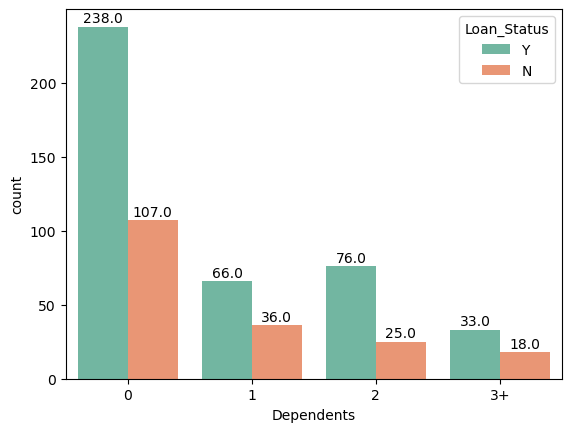

In [9]:
print("Number of people who take a loan group by 'Dependents':")
print(data['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 6), 
                textcoords='offset points')

**d. Visualization of Education**

Number of people who take a loan group by 'Education':
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


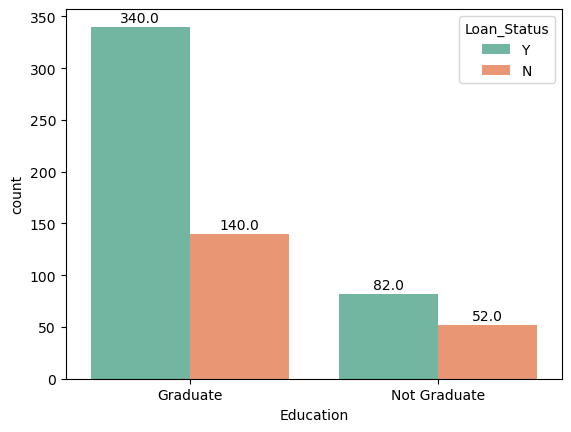

In [10]:
print("Number of people who take a loan group by 'Education':")
print(data['Education'].value_counts())
ax = sns.countplot(x='Education', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 6), 
                textcoords='offset points')

**e. Visualization of Self Employed**

Number of people who take a loan group by 'Self Employed':
No     500
Yes     82
Name: Self_Employed, dtype: int64


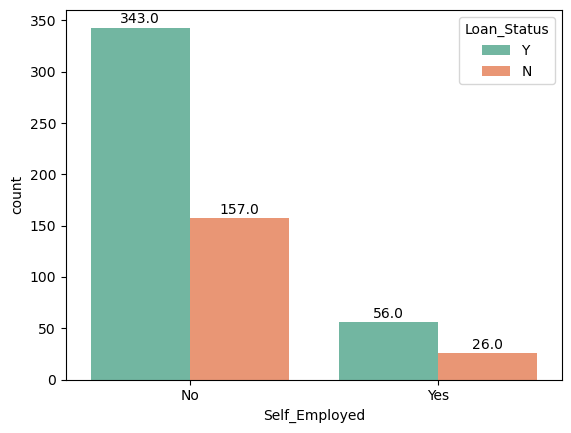

In [11]:
print("Number of people who take a loan group by 'Self Employed':")
print(data['Self_Employed'].value_counts())
ax = sns.countplot(x='Self_Employed', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 6), 
                textcoords='offset points')

**f. Visualization of Applicant Income**

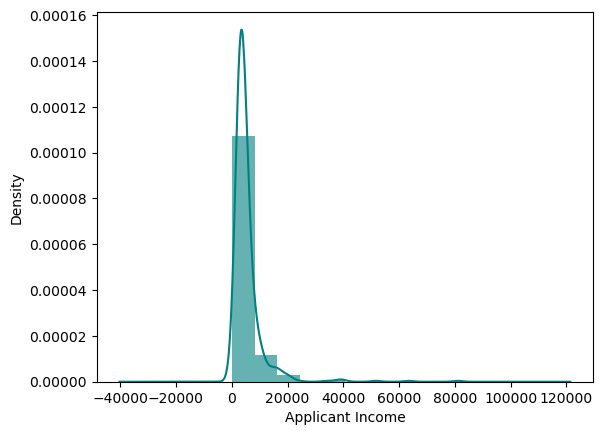

In [12]:
ax = data["ApplicantIncome"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["ApplicantIncome"].plot(kind='density', color='teal')
ax.set(xlabel='Applicant Income')
plt.show()

**g. Visualization of Co-Applicant Income**

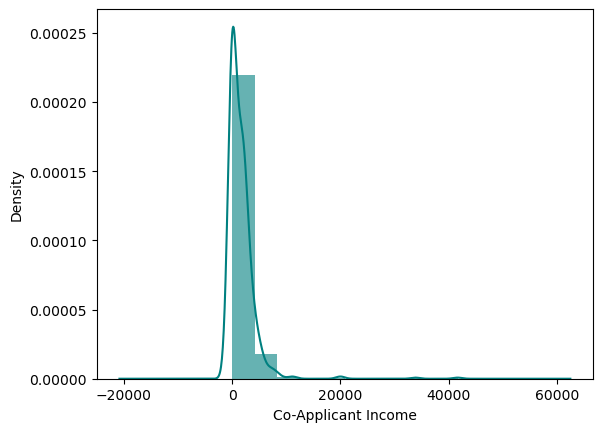

In [13]:
ax = data["CoapplicantIncome"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["CoapplicantIncome"].plot(kind='density', color='teal')
ax.set(xlabel='Co-Applicant Income')
plt.show()

**h. Visualization of Loan Amount**

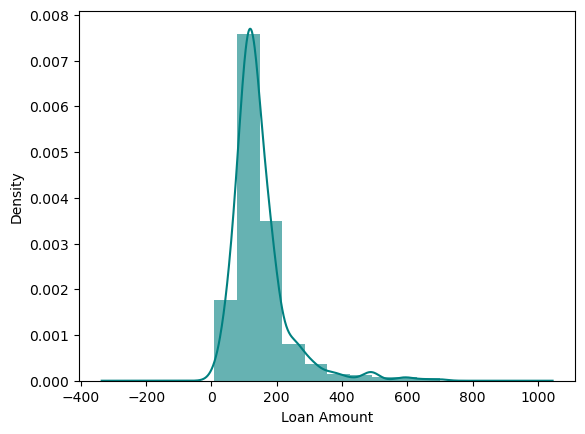

In [14]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

**i. Visualization of Loant Amount Term**

Number of people who take a loan group by 'Loan Amont Term':
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


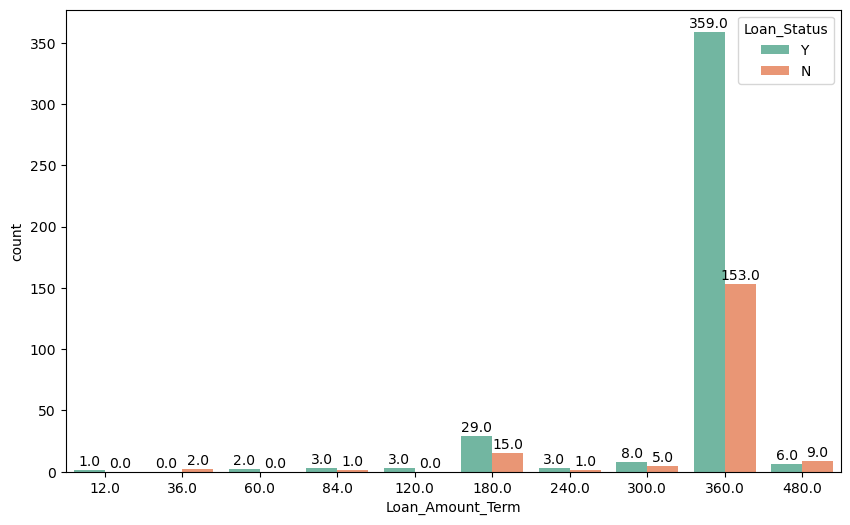

In [15]:
print("Number of people who take a loan group by 'Loan Amont Term':")
print(data['Loan_Amount_Term'].value_counts())
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Loan_Amount_Term', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 6), 
                textcoords='offset points')

**j. Visualization of Credit History**

Number of people who take a loan group by 'Credit History':
1.0    475
0.0     89
Name: Credit_History, dtype: int64


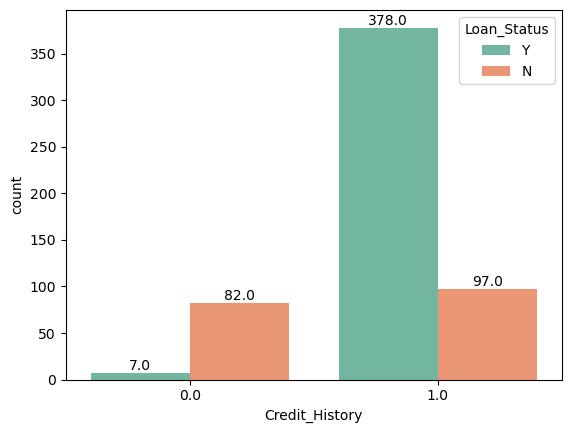

In [16]:
print("Number of people who take a loan group by 'Credit History':")
print(data['Credit_History'].value_counts())
ax = sns.countplot(x='Credit_History', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')

**k. Visualization of Property Area**

Number of people who take a loan group by 'Property Area':
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


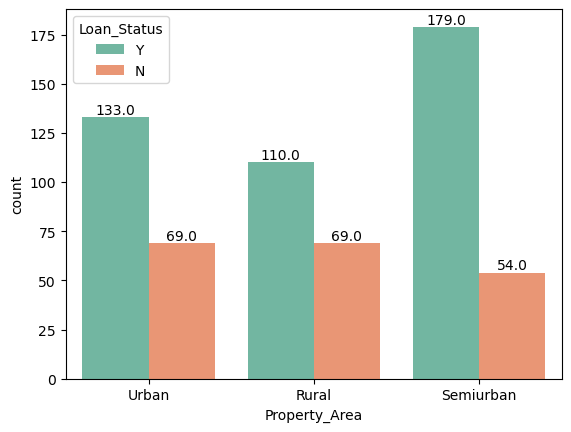

In [17]:
print("Number of people who take a loan group by 'Property Area':")
print(data['Property_Area'].value_counts())
ax = sns.countplot(x='Property_Area', hue="Loan_Status", data=data, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')

In [18]:
new_data = data.copy()
new_data['Gender'].fillna(new_data['Gender'].value_counts().idxmax(), inplace=True)
new_data['Married'].fillna(new_data['Married'].value_counts().idxmax(), inplace=True)
new_data['Dependents'].fillna(new_data['Dependents'].value_counts().idxmax(), inplace=True)
new_data['Self_Employed'].fillna(new_data['Self_Employed'].value_counts().idxmax(), inplace=True)
new_data["LoanAmount"].fillna(new_data["LoanAmount"].mean(skipna=True), inplace=True)
new_data['Loan_Amount_Term'].fillna(new_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
new_data['Credit_History'].fillna(new_data['Credit_History'].value_counts().idxmax(), inplace=True)
# Check missing value
new_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 4. Data Preprocessing

#### a. Converting Categorical Data into Numerical Data

In [19]:
new_data['Gender'] = new_data['Gender'].replace({"Female": 0, "Male": 1})
new_data['Married'] = new_data['Married'].replace({'No' : 0,'Yes' : 1})
new_data['Dependents'] = new_data['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
new_data['Education'] = new_data['Education'].replace({'Not Graduate' : 0, 'Graduate' : 1})
new_data['Self_Employed'] = new_data['Self_Employed'].replace({'No' : 0,'Yes' : 1})
new_data['Property_Area'] = new_data['Property_Area'].replace({'Semiurban' : 0, 'Urban' : 1,'Rural' : 2})
new_data['Loan_Status'] = new_data['Loan_Status'].replace({"N" : 0, "Y" : 1})

In [20]:
# Preview data information
check_data(new_data)

,type,amount_unique,unique_values,missing_values,percentage_missing_values(%)
Loan_ID,object,614,"[LP001002, LP001003, LP001005, LP001006, LP001...",0,0.0
Gender,int64,2,"[1, 0]",0,0.0
Married,int64,2,"[0, 1]",0,0.0
Dependents,int64,4,"[0, 1, 2, 3]",0,0.0
Education,int64,2,"[1, 0]",0,0.0
Self_Employed,int64,2,"[0, 1]",0,0.0
ApplicantIncome,int64,505,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",0,0.0
CoapplicantIncome,float64,287,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",0,0.0
LoanAmount,float64,204,"[146.41216216216216, 128.0, 66.0, 120.0, 141.0...",0,0.0
Loan_Amount_Term,float64,10,"[360.0, 120.0, 240.0, 180.0, 60.0, 300.0, 480....",0,0.0


C:\Users\Amar\AppData\Local\Temp\ipykernel_10404\3155918674.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(new_data.corr(),2), annot=True, cmap="coolwarm")


<Axes: >

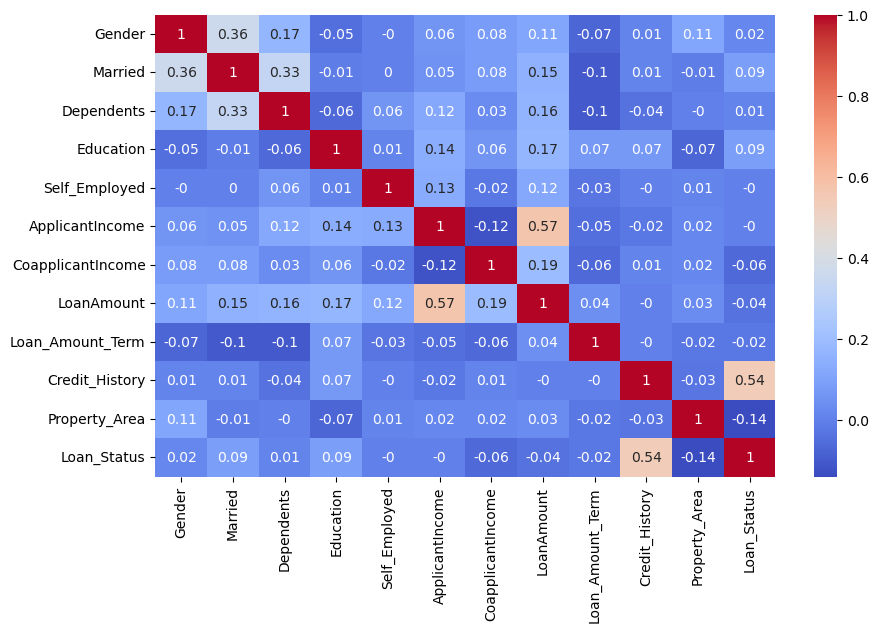

In [21]:
# Visualize Correlation of All Features with Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(round(new_data.corr(),2), annot=True, cmap="coolwarm")

In [22]:
x = new_data.iloc[:,1:12]
y = new_data.iloc[:,12]
print("Shape of x ", x.shape)
print("Shape of y ", y.shape)
x.head()

Shape of x  (614, 11)
Shape of y  (614,)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [23]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# **C. Modeling for Loan Approval Prediction**

### 1. Random Forest

In [24]:
rfc = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             max_depth=3,
                             max_features=3)
rfc_score = round(cross_val_score(rfc, x, y, cv=10).mean()*100, 2)
print('The accuration of classification using Random Forest is %.2f%%' %(rfc_score))

The accuration of classification using Random Forest is 80.80%


### 2. Logistic Regression

In [25]:
lr = LogisticRegression(max_iter=1000,
                        C=5)
lr_score = round(cross_val_score(lr, x, y, cv=10).mean()*100, 2)
print('The accuration of classification using Logistic Regression is %.2f%%' %(lr_score))

The accuration of classification using Logistic Regression is 80.63%


### 3. Naive Bayes

In [26]:
gnb = GaussianNB()
gnb_score = round(cross_val_score(gnb, x, y, cv=10).mean()*100, 2)
print('The accuration of classification using Gaussian Naive Bayes is %.2f%%' %(gnb_score))

The accuration of classification using Gaussian Naive Bayes is 79.17%


# **D. Model Evaluation Result**

                  Model  Accuracy (%)
0         Random Forest         80.80
1   Logistic Regression         80.63
2  Gaussian Naive Bayes         79.17

The Best model is Random Forest with a accuracy of 80.8%


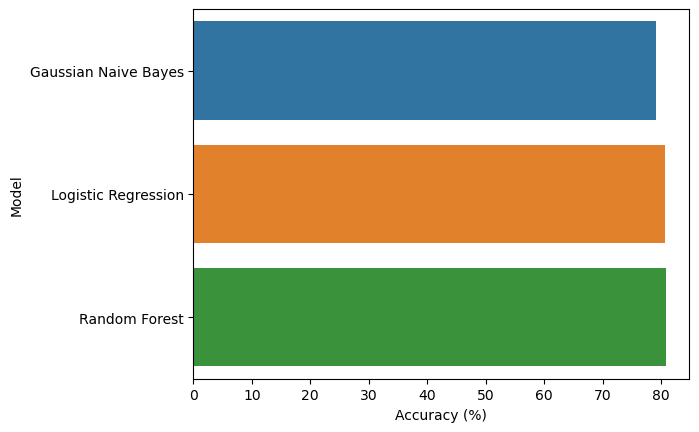

In [27]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Logistic Regression', 'Gaussian Naive Bayes'],
    'Accuracy (%)' : [ rfc_score, lr_score, gnb_score]})
    
print(models)
print('\nThe Best model is {} with a accuracy of {}%'.format(models.loc[models['Accuracy (%)'].idxmax(), 'Model'], 
                                                           models['Accuracy (%)'].max()))

# Visualize model evaluation result from each algorithms 
sns.barplot(x = 'Accuracy (%)', y = 'Model', 
            data = models.sort_values(by = 'Accuracy (%)', ascending = True))
plt.show()